In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import sys
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Below are pecialised libraries that deal with text processing.

import re
# gensim is a library for text processing including n-gram models
import gensim
from gensim.utils import simple_preprocess
# spacy is also for text processing, here we are using the lemmatiser
import spacy
# This package draws word clouds, as a form of frequency analysis
import wordcloud

import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import * 
from keras.utils import np_utils 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lets extract our sentences and have a look at the data we will be dealing with

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/appledata_sentiment.csv')
print('The shape of the dataframe is ', df.shape)
df.head()

The shape of the dataframe is  (4058, 5)


,Unnamed: 0,review,Country,vadar compound,sentiment
0,0,i got my new macbook pro m two weeks ago and ...,UK,0.9960,positive
1,1,i bought my mac from apple directly not from a...,UK,0.9440,positive
2,2,i own over computers and it blows away my ...,UK,0.8779,positive
3,3,it s a mac once you go mac you never go back ...,UK,0.0000,negative
4,4,dead at arrival kernel error took it to t...,UK,-0.7964,negative


In [4]:
import re
# Remove punctuation
df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
' ', x))

# ' ', x)) #Adding another layer of characters to be removed
# Convert the titles to lowercase
df['review'] = df['review'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(df['review'].apply(str).head())

0    i got my new macbook pro m  two weeks ago and ...
1    i bought my mac from apple directly not from a...
2    i own over    computers and it blows away my  ...
3    it s a mac once you go mac you never go back  ...
4    dead at arrival     kernel error  took it to t...
Name: review, dtype: object


In [5]:
data = df[['review', 'sentiment']]
data.head()

,review,sentiment
0,i got my new macbook pro m two weeks ago and ...,positive
1,i bought my mac from apple directly not from a...,positive
2,i own over computers and it blows away my ...,positive
3,it s a mac once you go mac you never go back ...,negative
4,dead at arrival kernel error took it to t...,negative


In [6]:
data2 = data.copy()

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(data['review'])
vocab_size = len(tok.word_index) + 1

tok.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'it': 4,
 'a': 5,
 'to': 6,
 'is': 7,
 'this': 8,
 'for': 9,
 'of': 10,
 'my': 11,
 'with': 12,
 'that': 13,
 'on': 14,
 'apple': 15,
 'but': 16,
 'not': 17,
 'macbook': 18,
 'in': 19,
 'have': 20,
 't': 21,
 'was': 22,
 's': 23,
 'laptop': 24,
 'you': 25,
 'm': 26,
 'so': 27,
 'as': 28,
 'great': 29,
 'battery': 30,
 'computer': 31,
 'one': 32,
 'be': 33,
 'had': 34,
 'new': 35,
 'very': 36,
 'mac': 37,
 'all': 38,
 'an': 39,
 'no': 40,
 'love': 41,
 'use': 42,
 'screen': 43,
 'from': 44,
 'like': 45,
 'are': 46,
 'at': 47,
 'can': 48,
 'me': 49,
 'if': 50,
 'pro': 51,
 'has': 52,
 'air': 53,
 'just': 54,
 'or': 55,
 'life': 56,
 'good': 57,
 'get': 58,
 'fast': 59,
 'only': 60,
 'up': 61,
 'would': 62,
 'will': 63,
 'they': 64,
 'time': 65,
 've': 66,
 'than': 67,
 'really': 68,
 'work': 69,
 'do': 70,
 'more': 71,
 'when': 72,
 'been': 73,
 'am': 74,
 'out': 75,
 'about': 76,
 'don': 77,
 'now': 78,
 'product': 79,
 'quality': 80,
 'what': 81,
 'which

In [8]:
y = data['sentiment']
y

0       positive
1       positive
2       positive
3       negative
4       negative
          ...   
4053    negative
4054    positive
4055    negative
4056    negative
4057    positive
Name: sentiment, Length: 4058, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 1])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # I changed the features to pick up 20500 important words from X
X = cv.fit_transform(data['review']).toarray()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import * 
from keras.utils import np_utils 
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix

# Neural Net with 1 hidden layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               805120    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 813,441
Trainable params: 813,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
203/203 [==============================

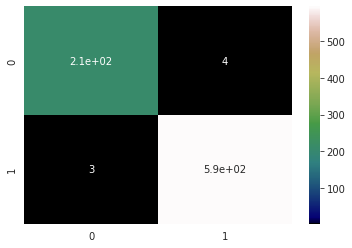

CPU times: user 23 s, sys: 1.15 s, total: 24.2 s
Wall time: 22.6 s


In [13]:
%%time
model = Sequential() 
model.add(Dense(units=128, activation='relu',  input_shape=(6289,))) 
model.add(Dropout(0.5)) 
model.add(Dense(units=64, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))

model.summary() 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    batch_size=16, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

pred = model.predict(X_test)
pred = np.where(pred>0.5, 1, 0)
matrix_confus = confusion_matrix(y_test, pred)

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
print(matrix_confus)
sns.heatmap(matrix_confus,annot=True, cmap = 'gist_earth')
plt.show()

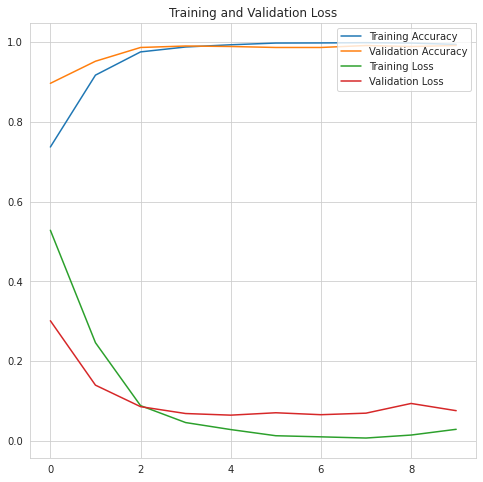

In [14]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy Neural Net') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss') 
#plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show()

# Deeper Neural Net with 4 hidden layer

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               1258000   
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                10050     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                             

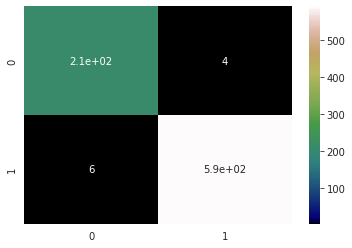

In [15]:
%time
epochs=10
model1 = Sequential(name='Model_1')

model1.add(Dense(units=200, activation='relu', input_shape=(6289,)))
model1.add(Dropout(0.2))

model1.add(Dense(units=50, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(units=50, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(units=50, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(units=50, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(1, activation='sigmoid'))

model1.summary()
model1.compile(loss='binary_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy'])

model1_history = model1.fit(X_train, y_train,
                    batch_size=10,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

score1 = model1.evaluate(X_test, y_test, verbose=0)

pred = model1.predict(X_test)
pred = np.where(pred>0.5, 1, 0)
matrix_confus = confusion_matrix(y_test, pred)
sns.heatmap(matrix_confus,annot=True, cmap = 'gist_earth')

print('Test loss:', score1[0]) 
print('Test accuracy:', score1[1])
print(matrix_confus)

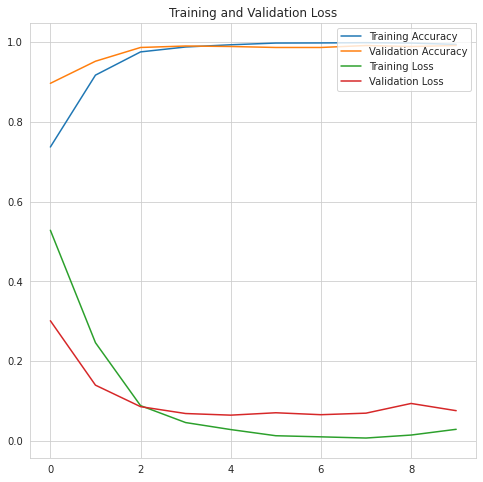

In [16]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy of Deeper Neural Net') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss') 
plt.show()

# EMBEDDING LAYER

In [17]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/drive/MyDrive/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


In [18]:
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tok.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 5741 words (573 misses)


In [19]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

# EMBEDDING +ANN

In [20]:
%time
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    vocab_size,
    100,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    trainable=False)

model = Sequential() 
model.add(embedding_layer)
model.add(Dense(units=256, activation='relu',  input_shape=(6289,))) 
model.add(Dropout(0.5)) 
model.add(Dense(units=164, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(1, activation='sigmoid'))

model.summary() 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    batch_size=64, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         631500    
                                                                 
 dense_9 (Dense)             (None, None, 256)         25856     
                                                                 
 dropout_7 (Dropout)         (None, None, 256)         0         
                                                                 
 dense_10 (Dense)            (None, None, 164)         42148     
                                                                 
 dropout_8 (Dropout)         (None, None, 164)         0         
                                                                 
 dense_11 (Dense)            (None, None, 1)           165       
                                                        

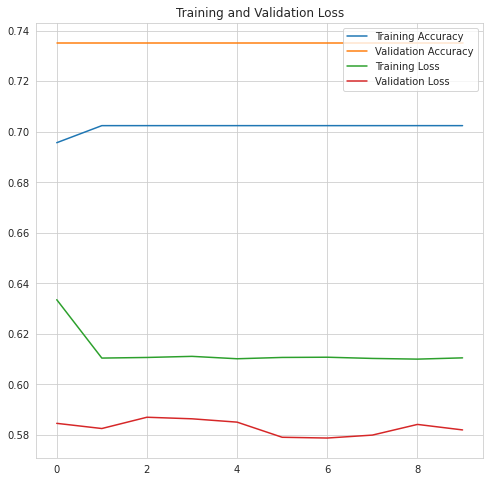

In [21]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy Neural Net + Embedding') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss')
plt.show()

#CNN + EMBEDDING

In [22]:
%time
from tensorflow.keras import layers
class_names = 2
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

preds = layers.Dense(class_names, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 30.3 µs
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         631500    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 128)        0       

In [23]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
26/26 [==============================] - 198s 8s/step - loss: 0.6308 - acc: 0.6981 - val_loss: 0.5698 - val_acc: 0.7352
Epoch 2/20
26/26 [==============================] - 192s 7s/step - loss: 0.6071 - acc: 0.7018 - val_loss: 0.5903 - val_acc: 0.7352
Epoch 3/20
26/26 [==============================] - 191s 7s/step - loss: 0.6050 - acc: 0.7012 - val_loss: 0.5678 - val_acc: 0.7352
Epoch 4/20
26/26 [==============================] - 190s 7s/step - loss: 0.5902 - acc: 0.7018 - val_loss: 0.5562 - val_acc: 0.7352
Epoch 5/20
26/26 [==============================] - 190s 7s/step - loss: 0.5788 - acc: 0.7006 - val_loss: 0.5413 - val_acc: 0.7352
Epoch 6/20
26/26 [==============================] - 190s 7s/step - loss: 0.5569 - acc: 0.7073 - val_loss: 0.5622 - val_acc: 0.7426
Epoch 7/20
26/26 [==============================] - 190s 7s/step - loss: 0.5588 - acc: 0.7212 - val_loss: 0.5128 - val_acc: 0.7352
Epoch 8/20
26/26 [==============================] - 190s 7s/step - loss: 0.5304 - a

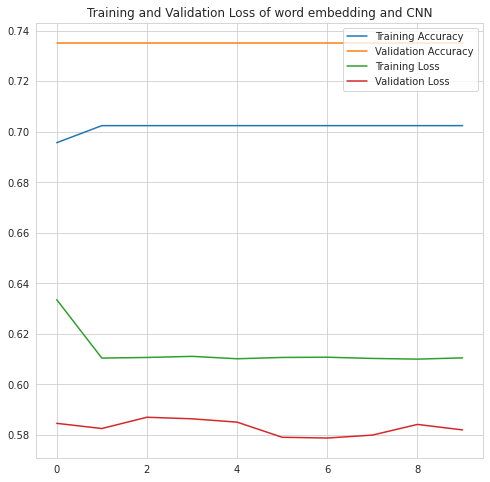

In [24]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss of word embedding and CNN') 
plt.show()